# Gantt Chart

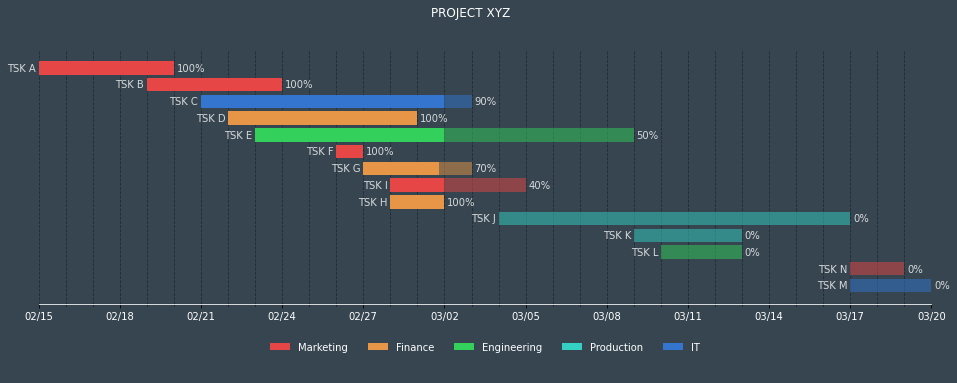

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

##### DATA #####
data = {'Task': {0: 'TSK M',
                 1: 'TSK N',
                 2: 'TSK L',
                 3: 'TSK K',
                 4: 'TSK J',
                 5: 'TSK H',
                 6: 'TSK I',
                 7: 'TSK G',
                 8: 'TSK F',
                 9: 'TSK E',
                 10: 'TSK D',
                 11: 'TSK C',
                 12: 'TSK B',
                 13: 'TSK A'},

 'Department': {0: 'IT',
                1: 'MKT',
                2: 'ENG',
                3: 'PROD',
                4: 'PROD',
                5: 'FIN',
                6: 'MKT',
                7: 'FIN',
                8: 'MKT',
                9: 'ENG',
                10: 'FIN',
                11: 'IT',
                12: 'MKT',
                13: 'MKT'},
 
 'Start': {0: Timestamp('2022-03-17 00:00:00'),
           1: Timestamp('2022-03-17 00:00:00'),
           2: Timestamp('2022-03-10 00:00:00'),
           3: Timestamp('2022-03-09 00:00:00'),
           4: Timestamp('2022-03-04 00:00:00'),
           5: Timestamp('2022-02-28 00:00:00'),
           6: Timestamp('2022-02-28 00:00:00'),
           7: Timestamp('2022-02-27 00:00:00'),
           8: Timestamp('2022-02-26 00:00:00'),
           9: Timestamp('2022-02-23 00:00:00'),
           10: Timestamp('2022-02-22 00:00:00'),
           11: Timestamp('2022-02-21 00:00:00'),
           12: Timestamp('2022-02-19 00:00:00'),
           13: Timestamp('2022-02-15 00:00:00')},
 
 'End': {0: Timestamp('2022-03-20 00:00:00'),
         1: Timestamp('2022-03-19 00:00:00'),
         2: Timestamp('2022-03-13 00:00:00'),
         3: Timestamp('2022-03-13 00:00:00'),
         4: Timestamp('2022-03-17 00:00:00'),
         5: Timestamp('2022-03-02 00:00:00'),
         6: Timestamp('2022-03-05 00:00:00'),
         7: Timestamp('2022-03-03 00:00:00'),
         8: Timestamp('2022-02-27 00:00:00'),
         9: Timestamp('2022-03-09 00:00:00'),
         10: Timestamp('2022-03-01 00:00:00'),
         11: Timestamp('2022-03-03 00:00:00'),
         12: Timestamp('2022-02-24 00:00:00'),
         13: Timestamp('2022-02-20 00:00:00')},
 
 'Completion': {0: 0.0,
                1: 0.0,
                2: 0.0,
                3: 0.0,
                4: 0.0,
                5: 1.0,
                6: 0.4,
                7: 0.7,
                8: 1.0,
                9: 0.5,
                10: 1.0,
                11: 0.9,
                12: 1.0,
                13: 1.0}}


##### DATA PREP ##### 
df = pd.DataFrame(data)

# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(16,6), gridspec_kw={'height_ratios':[6, 1]}, facecolor='#36454F')
ax.set_facecolor('#36454F')
ax1.set_facecolor('#36454F')
# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8, color='w')
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8, color='w')


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='k', linestyle='dashed', alpha=0.4, which='both')

# ticks
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3], color='w')
ax.set_yticks([])

plt.setp([ax.get_xticklines()], color='w')

# align x axis
ax.set_xlim(0, df.end_num.max())

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('w')



plt.suptitle('PROJECT XYZ', color='w')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Marketing'),
                   Patch(facecolor='#E69646', label='Finance'),
                   Patch(facecolor='#34D05C', label='Engineering'),
                   Patch(facecolor='#34D0C3', label='Production'),
                   Patch(facecolor='#3475D0', label='IT')]

legend = ax1.legend(handles=legend_elements, loc='upper center', ncol=5, frameon=False)
plt.setp(legend.get_texts(), color='w')

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

plt.savefig('figures/gantt.png', facecolor='#36454F')

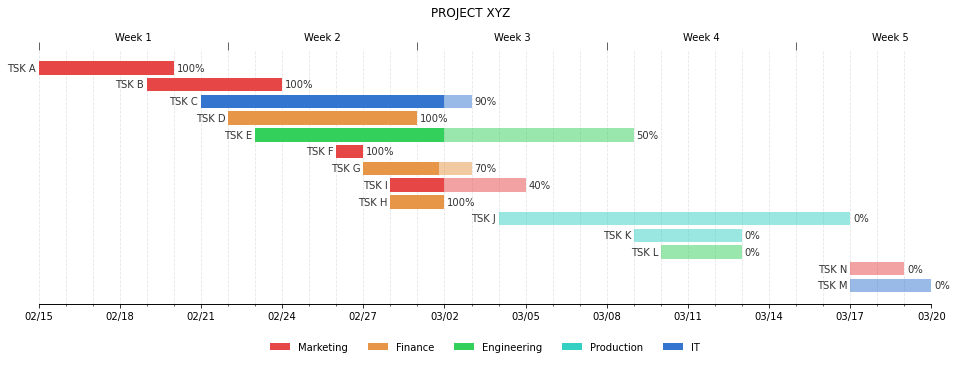

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pandas import Timestamp

##### DATA #####
data = {'Task': {0: 'TSK M',
                 1: 'TSK N',
                 2: 'TSK L',
                 3: 'TSK K',
                 4: 'TSK J',
                 5: 'TSK H',
                 6: 'TSK I',
                 7: 'TSK G',
                 8: 'TSK F',
                 9: 'TSK E',
                 10: 'TSK D',
                 11: 'TSK C',
                 12: 'TSK B',
                 13: 'TSK A'},

 'Department': {0: 'IT',
                1: 'MKT',
                2: 'ENG',
                3: 'PROD',
                4: 'PROD',
                5: 'FIN',
                6: 'MKT',
                7: 'FIN',
                8: 'MKT',
                9: 'ENG',
                10: 'FIN',
                11: 'IT',
                12: 'MKT',
                13: 'MKT'},
 
 'Start': {0: Timestamp('2022-03-17 00:00:00'),
           1: Timestamp('2022-03-17 00:00:00'),
           2: Timestamp('2022-03-10 00:00:00'),
           3: Timestamp('2022-03-09 00:00:00'),
           4: Timestamp('2022-03-04 00:00:00'),
           5: Timestamp('2022-02-28 00:00:00'),
           6: Timestamp('2022-02-28 00:00:00'),
           7: Timestamp('2022-02-27 00:00:00'),
           8: Timestamp('2022-02-26 00:00:00'),
           9: Timestamp('2022-02-23 00:00:00'),
           10: Timestamp('2022-02-22 00:00:00'),
           11: Timestamp('2022-02-21 00:00:00'),
           12: Timestamp('2022-02-19 00:00:00'),
           13: Timestamp('2022-02-15 00:00:00')},
 
 'End': {0: Timestamp('2022-03-20 00:00:00'),
         1: Timestamp('2022-03-19 00:00:00'),
         2: Timestamp('2022-03-13 00:00:00'),
         3: Timestamp('2022-03-13 00:00:00'),
         4: Timestamp('2022-03-17 00:00:00'),
         5: Timestamp('2022-03-02 00:00:00'),
         6: Timestamp('2022-03-05 00:00:00'),
         7: Timestamp('2022-03-03 00:00:00'),
         8: Timestamp('2022-02-27 00:00:00'),
         9: Timestamp('2022-03-09 00:00:00'),
         10: Timestamp('2022-03-01 00:00:00'),
         11: Timestamp('2022-03-03 00:00:00'),
         12: Timestamp('2022-02-24 00:00:00'),
         13: Timestamp('2022-02-20 00:00:00')},
 
 'Completion': {0: 0.0,
                1: 0.0,
                2: 0.0,
                3: 0.0,
                4: 0.0,
                5: 1.0,
                6: 0.4,
                7: 0.7,
                8: 1.0,
                9: 0.5,
                10: 1.0,
                11: 0.9,
                12: 1.0,
                13: 1.0}}


##### DATA PREP ##### 
df = pd.DataFrame(data)

# project start date
proj_start = df.Start.min()

# number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days

# number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days

# days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num

# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

# create a column with the color for each department
def color(row):
    c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return c_dict[row['Department']]

df['color'] = df.apply(color, axis=1)

##### PLOT #####
fig, (ax, ax1) = plt.subplots(2, figsize=(16,6), gridspec_kw={'height_ratios':[6, 1]})

# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8)
    ax.text(row.start_num-0.1, idx, row.Task, va='center', ha='right', alpha=0.8)


# grid lines
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.2, which='both')

# ticks
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
ax.set_yticks([])

# ticks top
# create a new axis with the same y
ax_top = ax.twiny()

# align x axis
ax.set_xlim(0, df.end_num.max())
ax_top.set_xlim(0, df.end_num.max())

# top ticks (markings)
xticks_top_minor = np.arange(0, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_minor, minor=True)
# top ticks (label)
xticks_top_major = np.arange(3.5, df.end_num.max()+1, 7)
ax_top.set_xticks(xticks_top_major, minor=False)
# week labels
xticks_top_labels = [f"Week {i}"for i in np.arange(1, len(xticks_top_major)+1, 1)]
ax_top.set_xticklabels(xticks_top_labels, ha='center', minor=False)

# hide major tick (we only want the label)
ax_top.tick_params(which='major', color='w')
# increase minor ticks (to marks the weeks start and end)
ax_top.tick_params(which='minor', length=8, color='k')

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['top'].set_visible(False)

ax_top.spines['right'].set_visible(False)
ax_top.spines['left'].set_visible(False)
ax_top.spines['top'].set_visible(False)

plt.suptitle('PROJECT XYZ')

##### LEGENDS #####
legend_elements = [Patch(facecolor='#E64646', label='Marketing'),
                   Patch(facecolor='#E69646', label='Finance'),
                   Patch(facecolor='#34D05C', label='Engineering'),
                   Patch(facecolor='#34D0C3', label='Production'),
                   Patch(facecolor='#3475D0', label='IT')]

ax1.legend(handles=legend_elements, loc='upper center', ncol=5, frameon=False)

# clean second axis
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks([])
ax1.set_yticks([])

plt.show()
plt.savefig('figures/gantt.png', facecolor='#36454F')